In [1]:
import numpy
numpy.random.seed(42)
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline

Using CNTK backend


In [2]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

mean = x_train.mean(axis = 0)
std = x_train.std(axis = 0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [3]:
model = Sequential()
model.add(Dense(128, activation = "relu", input_shape = (x_train.shape[1], )))
model.add(Dense(1))
model.compile(optimizer="adam", loss = "mse", metrics = ["mae"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
None


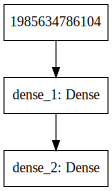

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
print(model.summary())
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

In [6]:
model.fit(x_train, y_train, epochs = 150, batch_size = 1, verbose = 2)

Epoch 1/150
 - 3s - loss: 321.6275 - mean_absolute_error: 15.0017
Epoch 2/150
 - 3s - loss: 43.9654 - mean_absolute_error: 4.4371
Epoch 3/150
 - 3s - loss: 27.5956 - mean_absolute_error: 3.5951
Epoch 4/150
 - 3s - loss: 22.3542 - mean_absolute_error: 3.2792
Epoch 5/150
 - 3s - loss: 19.1680 - mean_absolute_error: 3.0928
Epoch 6/150
 - 3s - loss: 16.5753 - mean_absolute_error: 2.8820
Epoch 7/150
 - 3s - loss: 14.8574 - mean_absolute_error: 2.7076
Epoch 8/150
 - 2s - loss: 13.1374 - mean_absolute_error: 2.5272
Epoch 9/150
 - 3s - loss: 11.5262 - mean_absolute_error: 2.3855
Epoch 10/150
 - 3s - loss: 11.0986 - mean_absolute_error: 2.3610
Epoch 11/150
 - 3s - loss: 10.5484 - mean_absolute_error: 2.2707
Epoch 12/150
 - 3s - loss: 9.9710 - mean_absolute_error: 2.1936
Epoch 13/150
 - 3s - loss: 9.4517 - mean_absolute_error: 2.1836
Epoch 14/150
 - 3s - loss: 9.3253 - mean_absolute_error: 2.1298
Epoch 15/150
 - 2s - loss: 9.0792 - mean_absolute_error: 2.1274
Epoch 16/150
 - 3s - loss: 9.0360 - 

Epoch 129/150
 - 3s - loss: 3.7691 - mean_absolute_error: 1.3795
Epoch 130/150
 - 3s - loss: 3.7099 - mean_absolute_error: 1.3671
Epoch 131/150
 - 3s - loss: 3.4608 - mean_absolute_error: 1.3331
Epoch 132/150
 - 3s - loss: 3.5578 - mean_absolute_error: 1.3789
Epoch 133/150
 - 2s - loss: 3.6412 - mean_absolute_error: 1.3833
Epoch 134/150
 - 3s - loss: 3.4507 - mean_absolute_error: 1.3214
Epoch 135/150
 - 4s - loss: 3.6185 - mean_absolute_error: 1.3519
Epoch 136/150
 - 4s - loss: 3.4265 - mean_absolute_error: 1.2962
Epoch 137/150
 - 4s - loss: 3.3104 - mean_absolute_error: 1.3010
Epoch 138/150
 - 3s - loss: 3.4435 - mean_absolute_error: 1.3464
Epoch 139/150
 - 3s - loss: 3.5274 - mean_absolute_error: 1.3815
Epoch 140/150
 - 4s - loss: 3.3440 - mean_absolute_error: 1.3262
Epoch 141/150
 - 4s - loss: 3.3496 - mean_absolute_error: 1.3076
Epoch 142/150
 - 3s - loss: 3.3918 - mean_absolute_error: 1.3102
Epoch 143/150
 - 4s - loss: 3.2776 - mean_absolute_error: 1.2782
Epoch 144/150
 - 4s - los

In [7]:
print("Точность - ", model.evaluate(x_test, y_test, verbose = 0)[1])

Точность -  2.4262885860368315
